In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
import re

np.random.seed(42)

%config InlineBackend.figure_format = 'retina'

In [13]:
df = pd.read_csv('NYC_crime.csv')
balt = pd.read_csv('Crimes_to_date_in_2013.csv') 
balt['year'] = philli['CrimeDate'].str[-4:]

In [14]:
balt
balt.groupby(['year']).count().iloc[:,0]

year
2014    44722
2015    48191
2016    48754
2017    52141
2018    48092
2019     9712
Name: CrimeDate, dtype: int64

In [3]:
sfpd = pd.read_csv('SFPD.csv')

In [4]:
sfpd.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [14]:
sfpd['X_coord'] = [sfpd['Location'][0]]
sfpd['Y_coord'] = sfpd['Location'][1]

ValueError: Length of values does not match length of index

In [16]:
sfpd['month']= sfpd['Date'].str[:2]
sfpd['year']=sfpd['Date'].str[-4:]

In [33]:
sfpd['Descript'].unique()

array(['LOST PROPERTY', 'ROBBERY, BODILY FORCE',
       'AGGRAVATED ASSAULT WITH BODILY FORCE', 'DOMESTIC VIOLENCE',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES',
       'AIDED CASE -PROPERTY FOR DESTRUCTION',
       'MALICIOUS MISCHIEF, VANDALISM',
       'BURGLARY OF STORE, UNLAWFUL ENTRY', 'PETTY THEFT SHOPLIFTING',
       'POSSESSION OF METH-AMPHETAMINE',
       'POSSESSION OF NARCOTICS PARAPHERNALIA', 'WARRANT ARREST',
       'ROBBERY, ARMED WITH A KNIFE', 'STOLEN AUTOMOBILE',
       'FOUND PROPERTY', 'ENROUTE TO OUTSIDE JURISDICTION',
       'PETTY THEFT FROM LOCKED AUTO',
       'DRIVERS LICENSE, SUSPENDED OR REVOKED',
       'ROBBERY ON THE STREET, STRONGARM',
       'BATTERY WITH SERIOUS INJURIES',
       'ATTEMPTED ROBBERY WITH A DEADLY WEAPON',
       'POSS OF TEAR GAS WEAPON', 'TRAFFIC VIOLATION',
       'BATTERY OF A POLICE OFFICER', 'ARSON',
       'POSSESSION OF BASE/ROCK COCAINE FOR SALE', 'RESISTING ARREST',
       'GRAND THEFT FROM LOCKED AUTO', 'MISSING ADULT',

In [29]:
sfpd['Y'].max(5)

ValueError: No axis named 5 for object type <class 'pandas.core.series.Series'>

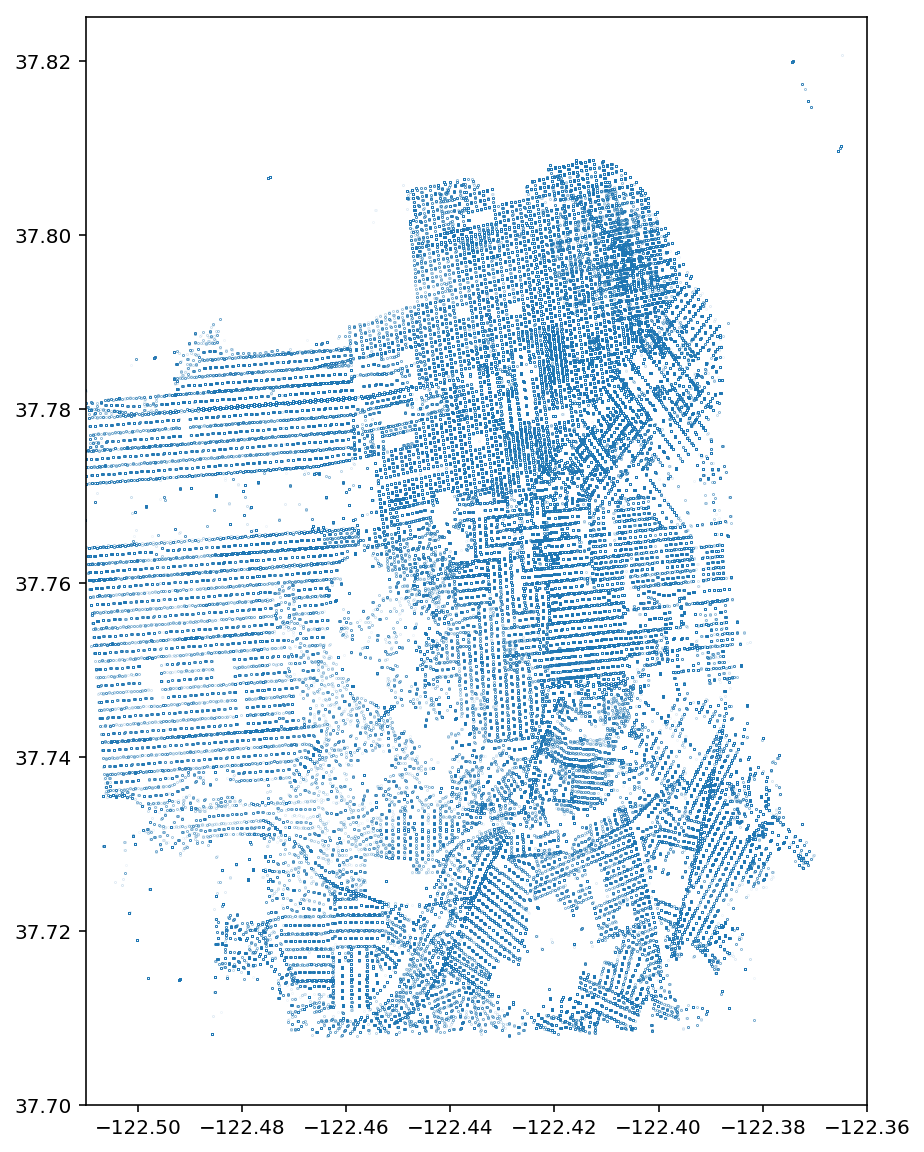

In [32]:
plt.figure(figsize = (7,10))
plt.axis([-122.51,-122.36,37.7,37.825])
plt.scatter(sfpd.X, sfpd.Y, s=.001, )
plt.show()

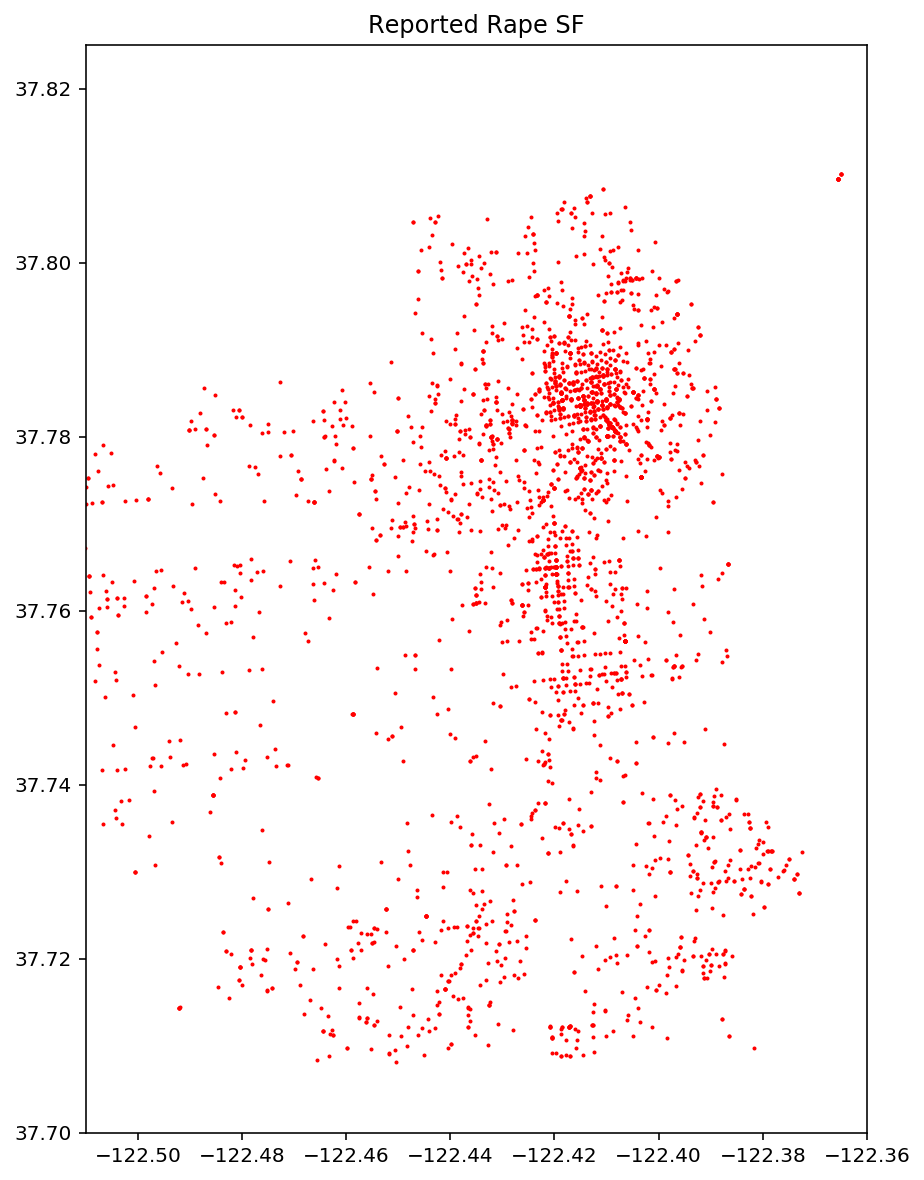

In [43]:
sfpd['severe']=sfpd['Descript'].str.contains('RAPE')
severe_sfpd=sfpd.loc[sfpd['severe']==True]
severe_sfpd
plt.figure(figsize = (7,10))
plt.axis([-122.51,-122.36,37.7,37.825])
plt.title('Reported Rape SF')
plt.scatter(severe_sfpd.X, severe_sfpd.Y, s=1, c='r')
plt.show()


In [39]:
severe_sfpd['X'].min()

-122.51105424825786

In [ ]:
plt.plot(sfpd.groupby(['month','year']).size().values)

In [ ]:
plt.plot(lapd.groupby(['year','month']).size().values)

In [ ]:
lapd.groupby('month').count().iloc[:,0]
sfpd.groupby('month').count().iloc[:,0]

In [19]:
sfpd.groupby(['year']).count().iloc[:,0]
lapd.groupby(['year']).count().iloc[:,0]

KeyError: 'year'

In [ ]:
lapd = pd.read_csv('Crime_Data_from_2010_to_Present.csv')

In [ ]:
lapd.columns

In [ ]:
sfpd.columns

In [ ]:
sfpd['Resolution'].unique()

In [ ]:
plt.figure(figsize = (7,10))
plt.scatter(df.Longitude, df.Latitude, s=8, c=(df.KY_CD))

In [ ]:
df.columns

In [ ]:
plt.figure(figsize = (7,10))
plt.scatter(df.Longitude, df.Latitude, s=8, c=(df.KY_CD))

In [ ]:
#ny = pd.read_excel('dv-complaint-radio-run-12-2018.xlsx')

In [ ]:
ny =ny.iloc[5:]

In [ ]:
ny.drop

In [ ]:
nypd

In [ ]:
nypd = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_.csv')
nypd['year']=(nypd['RPT_DT'].str[-4:])

In [ ]:
nypd.groupby('year').count().iloc[:,0]

In [ ]:
nypd['year'].unique()
nypd['year'].sort_values(ascending = True)

In [ ]:
nypd['year'].unique()

In [ ]:
nypd['year']=nypd['year'].replace('1018','2018')
nypd['year']=nypd['year'].replace('1017','2017')
nypd['year']=nypd['year'].replace('1016','2016')
nypd['year']=nypd['year'].replace('1028','1928')
nypd['year']=nypd['year'].replace('1025','1925')
nypd['int_year'] = pd.to_numeric(nypd['year'])

In [ ]:
cr18 = nypd['int_year']==2018
nypd[cr18]
cr15 = nypd['int_year']==2015
nypd[cr15]

In [ ]:
cr17 = nypd['int_year']==2017
nypd[cr17]

In [ ]:
cr16 = nypd['int_year']==2016
nypd[cr16]

In [ ]:
cr18 = nypd['int_year']==2018
nypd[cr18]

In [ ]:
plt.figure(figsize = (7,10))
plt.scatter(nypd[cr15].Longitude, nypd[cr15].Latitude, s=1, c=np.log(nypd[cr15].KY_CD))

In [ ]:
plt.figure(figsize = (7,10))
plt.scatter(nypd[cr18].Longitude, nypd[cr18].Latitude, s=1, c=np.log(nypd[cr18].KY_CD))

In [ ]:
plt.figure(figsize = (7,10))
plt.scatter(nypd[cr17].Longitude, nypd[cr17].Latitude, s=1, c=np.log(nypd[cr17].KY_CD))

In [ ]:
plt.figure(figsize = (7,10))
plt.scatter(nypd.Longitude, nypd.Latitude, s=1, c=(nypd.KY_CD))

In [ ]:
plt.figure(figsize = (7,10))
plt.scatter(nypd.Longitude, nypd.Latitude, s=1, c=np.log(nypd.KY_CD))

In [4]:
df = pd.read_csv('NYPD_current.csv')
df.sample(1000)
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon'],
      dtype='object')

In [ ]:
def tester(words):
    checker = set('assault', 'shooting', 'homicide', 'rape', 'sex crimes', 'kidnap', 'offenses related to children', 'manslaughter')
    

In [11]:
def alarm(complaint):
    flag = ['assault', 'shooting', 'homicide', 'rape', 'sex crimes', 'kidnap', 'offenses related to children', 'manslaughter']
    for word in flag:
        if word in complaint:
            return True
    return False

In [13]:
sentence = 'As a child my mom was terrified of me running off because she thought I would be.'

In [55]:
def severe(offenses):
    return offenses.str.contains('assault|shooting|rape|sex crimes|kidnap| offenses related to children|manslaughter', flags=re.IGORECASE, regex = True)

In [20]:
df['test'] = (df['OFNS_DESC'])

In [40]:
df['test'] = df['OFNS_DESC'].contains('assault|shooting|rape|sex crimes|kidnap| offenses related to children|manslaughter', regex = True).apply(severe)

AttributeError: module 're' has no attribute 'IGORECASE'

In [38]:
type(df['OFNS_DESC'])

pandas.core.series.Series

In [53]:
str.lower(str(df['OFNS_DESC'])).contains(('assault|shooting|rape|sex crimes|kidnap| offenses related to children|manslaughter').apply(severe))

AttributeError: 'str' object has no attribute 'contains'

In [59]:
pd.Series(str.lower(str(df['OFNS_DESC']))).contains(('assault|shooting|rape|sex crimes|kidnap| offenses related to children|manslaughter'))

AttributeError: 'Series' object has no attribute 'contains'

In [64]:
s1 = pd.Series(['Mouse', 'dog', 'house and parrot', '23', np.NaN])

In [65]:
type(s1)

pandas.core.series.Series

In [66]:
s1.str.contains('PARROT', flags=re.IGNORECASE, regex=True)

0    False
1    False
2     True
3    False
4      NaN
dtype: object

In [67]:
test = (df['OFNS_DESC'])

In [69]:
test.str.contains('assault|shooting|rape|sex crimes|kidnap| offenses related to children|manslaughter', flags=re.IGNORECASE, regex=True)

0          True
1         False
2          True
3         False
4          True
5          True
6         False
7         False
8         False
9         False
10        False
11         True
12        False
13        False
14        False
15         True
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27         True
28        False
29        False
          ...  
464035    False
464036    False
464037    False
464038    False
464039    False
464040    False
464041    False
464042    False
464043    False
464044    False
464045    False
464046    False
464047    False
464048     True
464049    False
464050    False
464051    False
464052    False
464053    False
464054    False
464055    False
464056    False
464057     True
464058     True
464059     True
464060    False
464061    False
464062    False
464063    False
464064     True
Name: OFNS_DESC, Length:

In [71]:
(df['OFNS_DESC']).str.contains('assault|shooting|rape|sex crimes|kidnap| offenses related to children|manslaughter', flags=re.IGNORECASE, regex=True)

0          True
1         False
2          True
3         False
4          True
5          True
6         False
7         False
8         False
9         False
10        False
11         True
12        False
13        False
14        False
15         True
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27         True
28        False
29        False
          ...  
464035    False
464036    False
464037    False
464038    False
464039    False
464040    False
464041    False
464042    False
464043    False
464044    False
464045    False
464046    False
464047    False
464048     True
464049    False
464050    False
464051    False
464052    False
464053    False
464054    False
464055    False
464056    False
464057     True
464058     True
464059     True
464060    False
464061    False
464062    False
464063    False
464064     True
Name: OFNS_DESC, Length:

In [74]:
def judge(crime):
    return str.upper('assault|shooting|rape|sex crimes|kidnap| offenses related to children|manslaughter') in crime

In [75]:
(df['OFNS_DESC']).apply(judge)

TypeError: argument of type 'float' is not iterable

In [76]:
df = pd.read_csv('NYPD_current.csv')

In [77]:
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,651421035,41.0,BRONX,11/28/2018,00:00:00,11/28/2018,00:01:00,COMPLETED,NaN,NaN,...,U,NaN,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN
1,149013323,14.0,MANHATTAN,12/31/2018,23:40:00,12/31/2018,23:50:00,COMPLETED,NaN,NaN,...,NaN,NaN,45-64,WHITE,F,987866.0,214721.0,40.756044,-73.986950,"(40.75604353500006, -73.98694954399997)"
2,642981531,73.0,BROOKLYN,12/31/2018,23:30:00,12/31/2018,23:40:00,COMPLETED,NaN,NaN,...,F,NaN,18-24,WHITE HISPANIC,F,1006995.0,185258.0,40.675146,-73.918003,"(40.67514616200003, -73.91800323399997)"
3,429685363,67.0,BROOKLYN,12/31/2018,23:20:00,12/31/2018,23:30:00,COMPLETED,NaN,NaN,...,M,NaN,25-44,BLACK,F,999584.0,169903.0,40.633016,-73.944756,"(40.63301598000004, -73.94475559899996)"
4,290330841,5.0,MANHATTAN,12/31/2018,23:15:00,12/31/2018,23:20:00,COMPLETED,NaN,NaN,...,U,NaN,25-44,WHITE,M,986164.0,202140.0,40.721512,-73.993096,"(40.72151233500005, -73.99309646799998)"


In [78]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon'],
      dtype='object')

In [79]:
df['OFNS_DESC'].unique()

array(['SEX CRIMES', 'GRAND LARCENY', 'ASSAULT 3 & RELATED OFFENSES',
       'CRIMINAL MISCHIEF & RELATED OF', 'VEHICLE AND TRAFFIC LAWS',
       'ROBBERY', 'HARRASSMENT 2', 'FELONY ASSAULT',
       'OFFENSES AGAINST PUBLIC ADMINI', 'INTOXICATED & IMPAIRED DRIVING',
       'OFF. AGNST PUB ORD SENSBLTY &', 'FRAUDS', 'PETIT LARCENY',
       'DANGEROUS DRUGS', 'MURDER & NON-NEGL. MANSLAUGHTER', 'BURGLARY',
       'FORGERY', 'MISCELLANEOUS PENAL LAW', 'RAPE',
       'INTOXICATED/IMPAIRED DRIVING', 'DANGEROUS WEAPONS',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'CRIMINAL TRESPASS',
       'GRAND LARCENY OF MOTOR VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
       'ADMINISTRATIVE CODE', 'OFFENSES AGAINST THE PERSON',
       "BURGLAR'S TOOLS", 'THEFT-FRAUD', 'KIDNAPPING & RELATED OFFENSES',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OTHER STATE LAWS (NON PENAL LA',
       'UNAUTHORIZED USE OF A VEHICLE', 'OFFENSES INVOLVING FRAUD',
       'POSSESSION OF STOLEN PROPERTY', 'ARSON', 'JOSTLING',
